Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/Credit Card Fraud Detection/

/content/gdrive/My Drive/Colab Notebooks/Credit Card Fraud Detection


In [ ]:
# loading the data set
credit_card_data = pd.read_csv("creditcard.csv")

In [ ]:
#first 5 rows 
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#last 5
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#Dataset Informattion
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#check for duplicate values
credit_card_data.duplicated().any()

True

In [ ]:
#deleting duplicate values
credit_card_data = credit_card_data.drop_duplicates()

credit_card_data.shape

(283726, 31)

This dataset is highly unbalanced

0 -> Normal Transaction

1 -> Farudulent Transaction

In [ ]:
#Standardizing the Amount Column
sc = StandardScaler()
credit_card_data['Amount'] = sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [ ]:
#distributuin of legit transaction and fraudulent transaction
credit_card_data["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

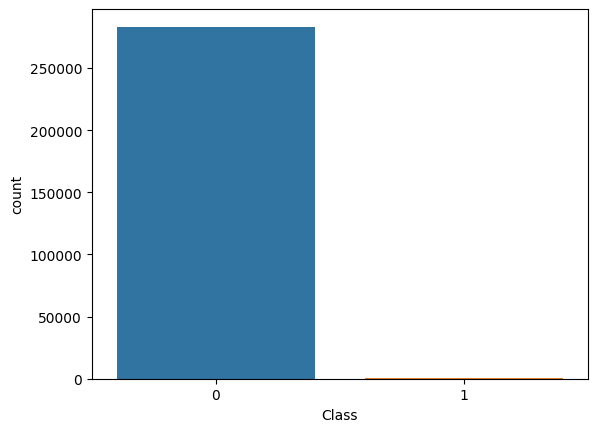

In [ ]:
sns.countplot(data=credit_card_data,x='Class')

In [ ]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         -0.000236
std           0.999920
min          -0.353327
25%          -0.330683
50%          -0.265467
75%          -0.043981
max         102.247564
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    473.000000
mean       0.141371
std        1.039186
min       -0.353327
25%       -0.349333
50%       -0.314109
75%        0.069558
max        8.136603
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,-0.000236
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.141371


## **Under-Sampling**

Build a sample dataset containing similar distribution of normal transaction and Fraudulent Transactions

Number of Fraudulent transaction -> 473

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(credit_card_data.drop(columns=['Class']), credit_card_data['Class'])
new_dataset = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
important_features = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Amount']
new_dataset = new_dataset[important_features + ['Class']]

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
new_dataset.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,Class
0,0.161690,-0.798504,0.933765,-0.255274,0.504579,0.951403,0.190258,0.194478,-0.828442,-0.184734,-0.343023,0
1,0.741620,0.746450,0.136546,-0.092854,0.388966,0.944906,0.123923,0.113382,-0.271922,-0.806430,-0.309237,0
2,0.942716,-0.136235,0.686810,-0.506743,-0.978479,-0.407787,-0.460737,0.631608,-0.291045,0.146259,-0.346218,0
3,-2.092921,0.191727,0.755031,-0.280493,1.846121,-1.461476,2.368907,-0.361398,0.127933,0.220937,0.274831,0
4,0.633063,0.584094,0.207289,1.596623,0.533205,0.604059,-0.172642,-0.450105,-0.137874,0.279328,-0.217064,0


In [ ]:
new_dataset.tail()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount,Class
941,-4.518331,1.749293,-0.882850,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,1.204187,1
942,-5.004247,1.411850,-1.413170,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,-0.350292,1
943,-2.213700,0.468308,-2.234739,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,-0.042263,1
944,-5.399730,1.817092,-2.208002,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,0.625112,1
945,-2.583441,0.408670,0.223050,-0.888722,0.491140,0.728903,-1.948883,0.519436,0.903562,1.197315,-0.183478,1


In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Amount
Class,,,,,,,,,,,
0,-0.033694,0.049128,0.062585,0.085900,-0.127024,-0.007659,-0.001234,-0.019163,-0.000549,0.011913,0.043872
1,-6.729599,4.472591,-5.175912,-5.453274,3.716347,-6.103254,-6.835946,-4.000956,-6.463285,-2.157071,0.141371


Splitting the data into Features and Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

           V3        V4        V7       V10       V11       V12       V14  \
0    0.161690 -0.798504  0.933765 -0.255274  0.504579  0.951403  0.190258   
1    0.741620  0.746450  0.136546 -0.092854  0.388966  0.944906  0.123923   
2    0.942716 -0.136235  0.686810 -0.506743 -0.978479 -0.407787 -0.460737   
3   -2.092921  0.191727  0.755031 -0.280493  1.846121 -1.461476  2.368907   
4    0.633063  0.584094  0.207289  1.596623  0.533205  0.604059 -0.172642   
..        ...       ...       ...       ...       ...       ...       ...   
941 -4.518331  1.749293 -0.882850 -5.587794  2.115795 -5.417424 -6.665177   
942 -5.004247  1.411850 -1.413170 -3.232153  2.858466 -3.096915 -5.210141   
943 -2.213700  0.468308 -2.234739 -3.463891  1.794969 -2.775022 -4.057162   
944 -5.399730  1.817092 -2.208002 -5.245984  1.933520 -5.030465 -6.416628   
945 -2.583441  0.408670  0.223050 -0.888722  0.491140  0.728903 -1.948883   

          V16       V17       V18    Amount  
0    0.194478 -0.828442 -0.18

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64


Split the data into Training Data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 11) (756, 11) (190, 11)


# **Model Training**

In [ ]:
#accuracy on training data
X_train_prediction_log = log.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_log, Y_train)

In [ ]:
print('Accuracy on Training data : ',training_data_accuracy)
print("Precision score on Test Data : ", precision_score(X_train_prediction_log, Y_train))
print("Recall score on Test Data : ", recall_score(X_train_prediction_log, Y_train))
print("F1 score on Test Data : ", f1_score(X_train_prediction_log, Y_train))

### **Logistic Regression**

A statistical technique for forecasting binary classes is logistic regression. The result or goal variable has a binary nature. It may be used, for instance, to issues with cancer detection. It determines the likelihood that an event will occur.

When the target variable is categorical, linear regression is used in a specific way. A log of the odds is used as the dependent variable. Using a logit function, logistic regression makes predictions about the likelihood that a binary event will occur.

The sigmoid function, also known as the logistic function, produces a 'S'-shaped curve that may transfer any real-valued integer to a value between 0 and 1. Y anticipated will become 1 if the curve travels to a positive infinity, and 0 if the curve goes to a negative infinity.


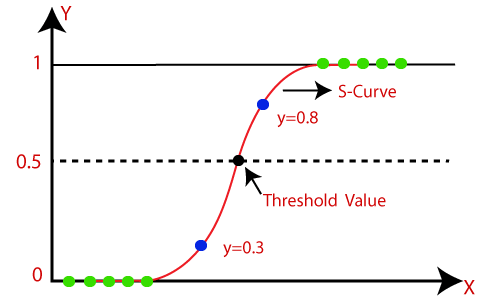

In [ ]:
log = LogisticRegression()

In [ ]:
#tarining the Logistic Regression Model with Training Data
log.fit(X_train,Y_train)

LogisticRegression()

###Model Evaluation

Accuracy Score, Precision Score, Recall Score & F1 Score

In [ ]:
#accuracy on test data
X_test_prediction_log = log.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_log, Y_test)

In [ ]:
print("Accuracy score on Test Data : ",test_data_accuracy)
print("Precision score on Test Data : ", precision_score(X_test_prediction_log, Y_test))
print("Recall score on Test Data : ", recall_score(X_test_prediction_log, Y_test))
print("F1 score on Test Data : ", f1_score(X_test_prediction_log, Y_test))

Accuracy score on Test Data :  0.9473684210526315
Precision score on Test Data :  0.8947368421052632
Recall score on Test Data :  1.0
F1 score on Test Data :  0.9444444444444444


### **Decision Tree Classifier**

A decision tree is a tree structure that resembles a flowchart where each leaf node symbolises the result and each inside node indicates a characteristic (or attribute). The root node in a decision tree is located at the top and gains the ability to divide data depending on attribute values. It uses visualisation to replicate thinking at the human level and is simple to understand and interpret. The amount of records and number of characteristics in the provided data determine the temporal complexity of decision trees. It is a non-parametric or distribution-free strategy that does not rely on the assumptions of a probability distribution.

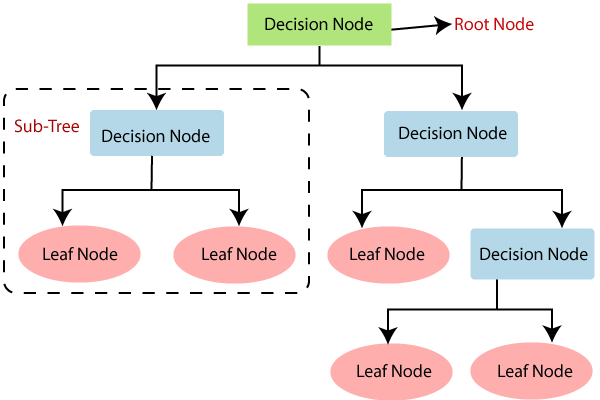

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
#tarining the Decision Tree Classifier Model with Training Data
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

###Model Evaluation

Accuracy Score, Precision Score, Recall Score & F1 Score

In [ ]:
X_test_prediction_dt = dt.predict(X_test)

In [ ]:
print("Accuracy score on Test Data : ", accuracy_score(X_test_prediction_dt, Y_test))
print("Precision score on Test Data : ", precision_score(X_test_prediction_dt, Y_test))
print("Recall score on Test Data : ", recall_score(X_test_prediction_dt, Y_test))
print("F1 score on Test Data : ", f1_score(X_test_prediction_dt, Y_test))

Accuracy score on Test Data :  0.9157894736842105
Precision score on Test Data :  0.9052631578947369
Recall score on Test Data :  0.9247311827956989
F1 score on Test Data :  0.9148936170212766


### **Random Forest**

The bagging technique is extended by the random forest algorithm, which uses feature randomness in addition to bagging to produce an uncorrelated forest of decision trees. The random subspace approach, also known as feature bagging, creates a random subset of features that guarantees minimal correlation between decision trees. The main distinction between decision trees and random forests is this. Random forests merely choose a portion of those feature splits, whereas decision trees consider all potential feature splits.

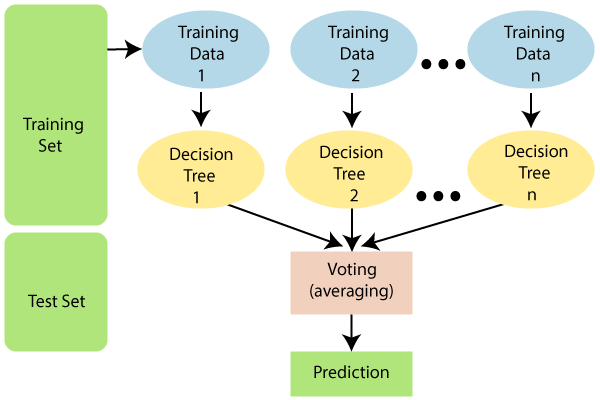

In [ ]:
rf = RandomForestClassifier()

In [ ]:
#tarining the Random Forest Classifier Model with Training Data
rf.fit(X_train,Y_train)

RandomForestClassifier()

###Model Evaluation

Accuracy Score, Precision Score, Recall Score & F1 Score

In [ ]:
X_test_prediction_rf = rf.predict(X_test)

In [ ]:
print("Accuracy score on Test Data : ", accuracy_score(X_test_prediction_rf, Y_test))
print("Precision score on Test Data : ", precision_score(X_test_prediction_rf, Y_test))
print("Recall score on Test Data : ", recall_score(X_test_prediction_rf, Y_test))
print("F1 score on Test Data : ", f1_score(X_test_prediction_rf, Y_test))

Accuracy score on Test Data :  0.9473684210526315
Precision score on Test Data :  0.9052631578947369
Recall score on Test Data :  0.9885057471264368
F1 score on Test Data :  0.945054945054945


### **XGBoost Classifier**

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. It has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks. It has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time. It is highly customizable and allows for fine-tuning of various model parameters to optimize performance.

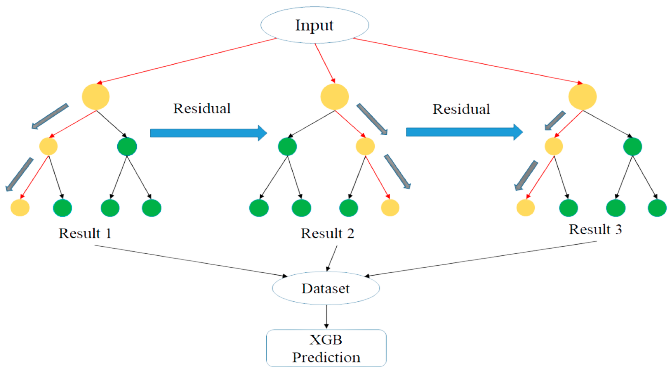

In [ ]:
xgb = XGBClassifier(random_state=42)

In [ ]:
params = {'max_depth': [3, 4, 5],
          'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.3]}

grid_search = GridSearchCV(xgb, params, cv=3, n_jobs=-1)

In [ ]:
#tarining the XGBoost Classifier Model with Training Data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [ ]:
xgb_model = grid_search.best_estimator_

In [ ]:
X_test_prediction_xgb = xgb_model.predict(X_test)

###Model Evaluation

Accuracy Score, Precision Score, Recall Score & F1 Score

In [ ]:
X_test_prediction_xgb = best_model.predict(X_test)

In [ ]:
print("Accuracy score on Test Data : ", accuracy_score(X_test_prediction_xgb, Y_test))
print("Precision score on Test Data : ", precision_score(X_test_prediction_xgb, Y_test))
print("Recall score on Test Data : ", recall_score(X_test_prediction_xgb, Y_test))
print("F1 score on Test Data : ", f1_score(X_test_prediction_xgb, Y_test))

Accuracy score on Test Data :  0.9526315789473684
Precision score on Test Data :  0.9157894736842105
Recall score on Test Data :  0.9886363636363636
F1 score on Test Data :  0.9508196721311476


Comparing Accuracy Score 

In [ ]:
comparing_accuracy = pd.DataFrame({'Models':['LR', 'DT', 'RF', 'XGB'], 'ACC':[accuracy_score(X_test_prediction_log, Y_test)*100,
                                                  accuracy_score(X_test_prediction_dt, Y_test)*100,
                                                  accuracy_score(X_test_prediction_rf, Y_test)*100,
                                                  accuracy_score(X_test_prediction_xgb, Y_test)*100
                                                  ]})

<Axes: xlabel='Models', ylabel='ACC'>

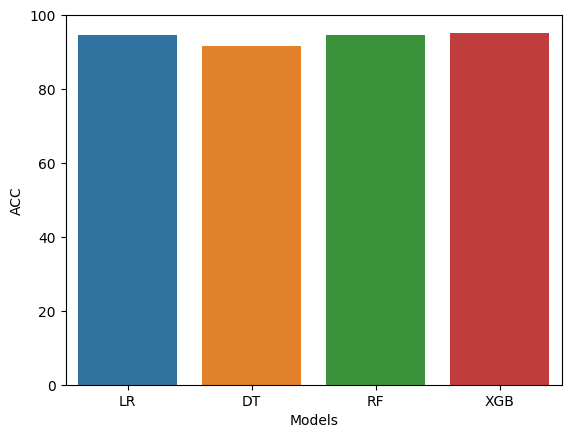

In [ ]:
sns.barplot(x='Models', y='ACC', data=comparing_accuracy)